# Project: FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**I selected the FBI gun data for analysis. Specifically I am interested in which states are buying the most guns and what the population of those states looks like.**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data files
gun_df = pd.read_excel('gun_data.xlsx')
census_df = pd.read_csv('U.S. Census Data.csv')

In [3]:
# Starting with gun data
# Check file load and basic data structure
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
# Check some basic stats
gun_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
# Check data types and missing values
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [6]:
# Check for any duplicates
sum(gun_df.duplicated())

0

**There are no duplicates in the gun data, but there are lots of NaNs in several rows, I should convert floats to ints for calculations, and I want to split month-year into 2 columns for easier grouping.**

**Now let's take a look at the census data.**

In [7]:
# Check file load and basic data structure
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [8]:
# Check data types
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

**The states all have 65 rows of data while Fact and Fact Note have different row counts. Let's take a look at these columns.**

In [9]:
census_df['Fact'].unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

In [10]:
census_df

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


**Fact appears to be the labels for the data, while Fact Note is rarely populated. Rows 65 to the end are just explanations of the Fact Notes and don't contain any data. I'll get rid of Fact Note but keep Fact for the labels, and I also need to clean up any other NaNs, duplicates, and some of the number formats.**

### Data Cleaning

**Starting with the gun data again, let's handle NaNs, split month-year into 2 columns, and convert floats to ints.**

In [11]:
# Fill NaNs with means
gun_df.fillna(gun_df.mean(), inplace=True)

In [12]:
# Split month into month, year
gun_df.rename(columns={'month': 'dates'}, inplace=True)
gun_df['year'] = gun_df['dates'].apply(lambda x: x.split("-")[0]).astype(int)
gun_df['month'] = gun_df['dates'].apply(lambda x: x.split("-")[1]).astype(int)

In [13]:
# Drop original month-year column
gun_df.drop('dates',axis=1, inplace=True)

In [14]:
# Convert to ints
cols = gun_df.columns.tolist()
cols.remove('state')
gun_df[cols] = gun_df[cols].applymap(np.int64)

In [15]:
# Check data formats
gun_df.groupby(['year','state']).sum()

permit  permit_recheck  handgun  long_gun  other  \
year state                                                                    
1998 Alabama                    0            2330    10567     25723    720   
     Alaska                     4            2330     1365      2555    720   
     Arizona                 1733            2330     7157      8275    720   
     Arkansas                   0            2330     4649     16914    720   
     California              5366            2330    28641     33438    720   
     Colorado                   0            2330     7925     15233    720   
     Connecticut             2817            2330     1521      2486    720   
     Delaware                   0            2330      507      1618    720   
     District of Columbia       0            2330        0         0    720   
     Florida                    0            2330    11507     19283    720   
     Georgia                  473            2330     1288      1665    720   
     Guam                       0            2330        2         7    720   
     Hawaii                   401            2330        1        29    720   
     Idaho                      0            2330     1873      5033    720   
     Illinois               24026            2330     6207     11050    720   
     Indiana                    0            2330     5357     17143    720   
     Iowa                    7835            2330       66      6738    720   
     Kansas                     0            2330     3225      9011    720   
     Kentucky                   0            2330    11243     20206    720   
     Louisiana                  0            2330     7572     19860    720   
     Maine                      0            2330     1210      2848    720   
     Mariana Islands         6413            2330     5940      7810    720   
     Maryland                1638            2330      953      6405    720   
     Massachusetts              0            2330      321      1116    720   
     Michigan               10086            2330      127     20373    720   
     Minnesota               1999            2330     1105      8967    720   
     Mississippi                0            2330     7124     18771    720   
     Missouri                   0            2330     4212     19753    720   
     Montana                    0            2330     1795      4525    720   
     Nebraska                1925            2330       91      4633    720   
...                           ...             ...      ...       ...    ...   
2017 Minnesota             346901               0    78202     88846   5998   
     Mississippi            16293               0    73897     48224   2415   
     Missouri                7863               0   183064    123928  10977   
     Montana                13773               6    24541     34576   1547   
     Nebraska               33172             624     1138     14619    166   
     Nevada                 20903               0    41577     22406   2304   
     New Hampshire          20097               0    46612     25961   1393   
     New Jersey                 0               0    47381     28015   1717   
     New Mexico             10389               0    49729     35230   3745   
     New York               26316           12576    96405    122593   9192   
     North Carolina        228436               0    12055     99717   6223   
     North Dakota            9729               0    14383     20292    895   
     Ohio                  109493            2628   244699    139129  14060   
     Oklahoma                   0               0   102785     77253   8495   
     Oregon                 25367             138   122185     92090      0   
     Pennsylvania          233862               0   409604    111462    912   
     Puerto Rico                0               0     9965      1753    375   
     Rhode Island               0               0     9771      5823    686  

**Also, the census data starts with 2010, so I will only keep gun data from 2010 and later.**

In [16]:
# Drop everything before 2010 since that's when census data starts
gun_df = gun_df[gun_df.year >= 2010]

**Moving onto census data, I want to drop Fact Note, drop NaN rows, and clean up number formats.**

In [17]:
# Drop fact note
census_df.drop('Fact Note', axis=1, inplace=True)

In [18]:
# Drop nulls and rows without any state data
census_df.dropna(axis=0,how='any',inplace=True)
census_df.drop(64,axis=0,inplace=True)

In [19]:
# Sanity check for duplicates
sum(census_df.duplicated())

0

In [20]:
# Clean up numbers
cols = census_df.columns.tolist()
cols.remove('Fact')
census_df[cols] = census_df[cols].replace({',':''}, regex=True)
census_df[cols] = census_df[cols].replace({'\$':''}, regex=True)
census_df[cols] = census_df[cols].replace({'\%':''}, regex=True)
census_df[cols] = census_df[cols].replace({'[A-Z]+':'NaN'}, regex=True)
census_df[cols] = census_df[cols].applymap(np.float64)

In [21]:
# From reviewing the data, some percentages were in percent format, some in decimal
# Now that percent signs are gone, need to check for values < 1 that indicate decimal format
census_df[(census_df < 1.0).any(axis=1)]

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2,"Population, percent change - April 1, 2010 (es...",1.7,4.5,8.4,2.5,5.4,10.2,0.1,6.0,9.6,...,0.063,0.048,10.8,10.4,-0.2,5.1,8.4,-1.2,1.6,3.9
4,"Persons under 5 years, percent, July 1, 2016, ...",6.0,7.3,6.3,6.4,6.3,6.1,5.2,5.8,5.5,...,0.071,0.061,7.2,8.3,4.9,6.1,6.2,5.5,5.8,6.5
5,"Persons under 5 years, percent, April 1, 2010",6.4,7.6,7.1,6.8,6.8,6.8,5.7,6.2,5.7,...,0.073,0.064,7.7,9.5,5.1,6.4,6.5,5.6,6.3,7.1
6,"Persons under 18 years, percent, July 1, 2016,...",22.6,25.2,23.5,23.6,23.2,22.8,21.1,21.5,20.1,...,0.246,0.226,26.2,30.2,19.0,22.2,22.4,20.5,22.3,23.7
7,"Persons under 18 years, percent, April 1, 2010",23.7,26.4,25.5,24.4,25.0,24.4,22.9,22.9,21.3,...,0.249,0.236,27.3,31.5,20.7,23.2,23.5,20.9,23.6,24.0
8,"Persons 65 years and over, percent, July 1, 2...",16.1,10.4,16.9,16.3,13.6,13.4,16.1,17.5,19.9,...,0.160,0.157,12.0,10.5,18.1,14.6,14.8,18.8,16.1,15.0
9,"Persons 65 years and over, percent, April 1, 2010",13.8,7.7,13.8,14.4,11.4,10.9,14.2,14.4,17.3,...,0.143,0.134,10.3,9.0,14.6,12.2,12.3,16.0,13.7,12.4
10,"Female persons, percent, July 1, 2016, (V2016)",51.6,47.7,50.3,50.9,50.3,49.7,51.2,51.6,51.1,...,0.496,0.512,50.4,49.7,50.6,50.8,50.0,50.5,50.3,48.9
11,"Female persons, percent, April 1, 2010",51.5,48.0,50.3,50.9,50.3,49.9,51.3,51.6,51.1,...,0.500,0.513,50.4,49.8,50.7,50.9,50.2,50.7,50.4,49.0
12,"White alone, percent, July 1, 2016, (V2016)",69.3,66.1,83.3,79.4,72.7,87.5,80.6,70.1,77.6,...,0.852,0.787,79.4,91.1,94.6,70.0,80.0,93.6,87.5,92.8


In [22]:
# It looks like these are limited to certain states, but let's verify with a count
census_df[census_df < 1.0].count()

Fact               0
Alabama            2
Alaska             1
Arizona            1
Arkansas           1
California         1
Colorado           1
Connecticut        3
Delaware           2
Florida            2
Georgia            2
Hawaii             2
Idaho              2
Illinois           3
Indiana            2
Iowa               2
Kansas             1
Kentucky           2
Louisiana          3
Maine              2
Maryland           2
Massachusetts      2
Michigan           2
Minnesota          1
Mississippi        3
Missouri           2
Montana            3
Nebraska           1
Nevada             1
New Hampshire      2
New Jersey         3
New Mexico        29
New York          29
North Carolina    29
North Dakota      29
Ohio              29
Oklahoma          29
Oregon            29
Pennsylvania      29
Rhode Island      29
South Carolina    29
South Dakota      29
Tennessee         29
Texas              1
Utah               0
Vermont            2
Virginia           2
Washington   

In [23]:
# Confirmed that NM - TN all have 29 percentages in decimal format, so let's multiply them by 100 to match the format of percent values
cols_to_fix = census_df[census_df < 1.0].count() >= 29
census_df.loc[census_df[(census_df < 1.0).any(axis=1)].index,census_df[cols_to_fix.index[cols_to_fix]].columns] *= 100

In [24]:
# Double check the count after updating
census_df[census_df < 1.0].count()

Fact              0
Alabama           2
Alaska            1
Arizona           1
Arkansas          1
California        1
Colorado          1
Connecticut       3
Delaware          2
Florida           2
Georgia           2
Hawaii            2
Idaho             2
Illinois          3
Indiana           2
Iowa              2
Kansas            1
Kentucky          2
Louisiana         3
Maine             2
Maryland          2
Massachusetts     2
Michigan          2
Minnesota         1
Mississippi       3
Missouri          2
Montana           3
Nebraska          1
Nevada            1
New Hampshire     2
New Jersey        3
New Mexico        1
New York          1
North Carolina    1
North Dakota      1
Ohio              3
Oklahoma          2
Oregon            1
Pennsylvania      3
Rhode Island      2
South Carolina    2
South Dakota      1
Tennessee         2
Texas             1
Utah              0
Vermont           2
Virginia          2
Washington        1
West Virginia     4
Wisconsin         1


**Now that the data is formatted correctly and nulls have been removed, I need to merge the files in order to do analysis on them together.**

In [25]:
# Reminder of census layout
census_df.head(1)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,20612439.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0


In [26]:
# Reminder of gun data layout
gun_df.head(1)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,month
0,Alabama,16717,0,5734,6320,221,317,0,15,21,...,0,9,16,3,0,0,3,32019,2017,9


**I need to transpose the census data in order to compare state gun data to state demographics.**

In [27]:
# Set Fact to the index to convert it to column headers in the transposed layout
census_df.set_index('Fact', inplace=True)
census_df_T = census_df.transpose().reset_index()

In [28]:
# Rename new index to state in order to join to gun data
census_df_T.rename(columns={'index':'state'}, inplace=True)

In [29]:
# I'm primarily interested in gun data totals for 2016 and 2010 to compare to those years of demographic data
gun_2016_df = gun_df[gun_df.year == 2016].groupby('state').sum().reset_index()
gun_2010_df = gun_df[gun_df.year == 2010].groupby('state').sum().reset_index()

In [30]:
# Merge 2016 and 2010 totals
gun_totals_df = gun_2016_df.merge(gun_2010_df, on='state', how='inner')

In [31]:
# Merge gun totals with census data
full_df = gun_totals_df.merge(census_df_T, on='state', how='inner')

In [32]:
# Now that gun and population data are combined, calculate 2016 and 2010 Guns per capita
full_df['2016 - Guns per capita'] = full_df['totals_x'] / full_df['Population estimates, July 1, 2016,  (V2016)']
full_df['2010 - Guns per capita'] = full_df['totals_y'] / full_df['Population estimates base, April 1, 2010,  (V2016)']

In [33]:
# Reset to a numerical index for graphing
full_df.reset_index()

,index,state,permit_x,permit_recheck_x,handgun_x,long_gun_x,other_x,multiple_x,admin_x,prepawn_handgun_x,...,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",2016 - Guns per capita,2010 - Guns per capita
0,0,Alabama,291039,1165,153123,121963,6104,6545,5,111,...,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,0.126858,0.064560
1,1,Alaska,3121,1165,37491,36887,2889,2316,0,84,...,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95,0.118140,0.092797
2,2,Arizona,87771,6274,166784,108988,13122,7908,0,74,...,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08,0.060060,0.032234
3,3,Arkansas,55456,8201,80244,82120,3059,4400,143,77,...,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48,0.089020,0.065654
4,4,California,1036981,1165,560355,554550,211707,0,0,0,...,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22,0.060565,0.021914
5,5,Colorado,85087,1165,242502,180026,15890,14293,0,0,...,284554.0,194508.0,85849.0,442365.0,51722.0,469524.0,48.5,103641.89,0.097556,0.059813
6,6,Connecticut,148949,1165,122375,43813,2445,0,108,0,...,187845.0,106678.0,56113.0,259614.0,31056.0,281182.0,738.1,4842.36,0.088829,0.050249
7,7,Delaware,8440,1165,25574,21746,1268,1034,0,22,...,38328.0,23964.0,14440.0,54782.0,7206.0,60318.0,460.8,1948.54,0.062422,0.021427
8,8,Florida,337086,1165,662308,316232,42439,25142,264,170,...,1084885.0,807817.0,926112.0,1121749.0,185756.0,1846686.0,350.6,53624.76,0.069635,0.029745
9,9,Georgia,233115,1165,194800,128277,6474,7478,0,136,...,480578.0,376506.0,371588.0,538893.0,96787.0,800585.0,168.4,57513.49,0.059453,0.034396


<a id='eda'></a>
## Exploratory Data Analysis


### Which states had the highest gun ownership per capita in 2010 / 2016?

<BarContainer object of 50 artists>

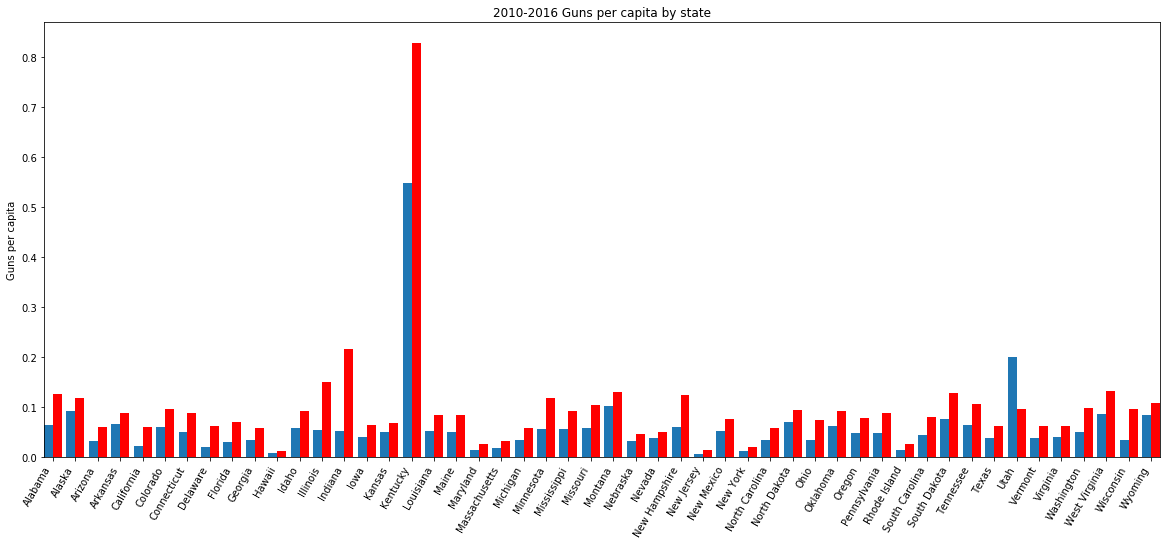

In [34]:
x = full_df.index
y1 = full_df['2010 - Guns per capita']
y2 = full_df['2016 - Guns per capita']

fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylabel('Guns per capita')
ax.set_title('2010-2016 Guns per capita by state')

width = .40
plt.xticks(x + width / 2, full_df.state, rotation=60, horizontalalignment='right')
ax.margins(x=0)
#ax.set_xticks(x + width / 2)
#ax.set_xticklabels(full_df.state)

ax.bar(x,y1,width,align='center')
ax.bar(x + width,y2,width,align='center',color='red')

<BarContainer object of 50 artists>

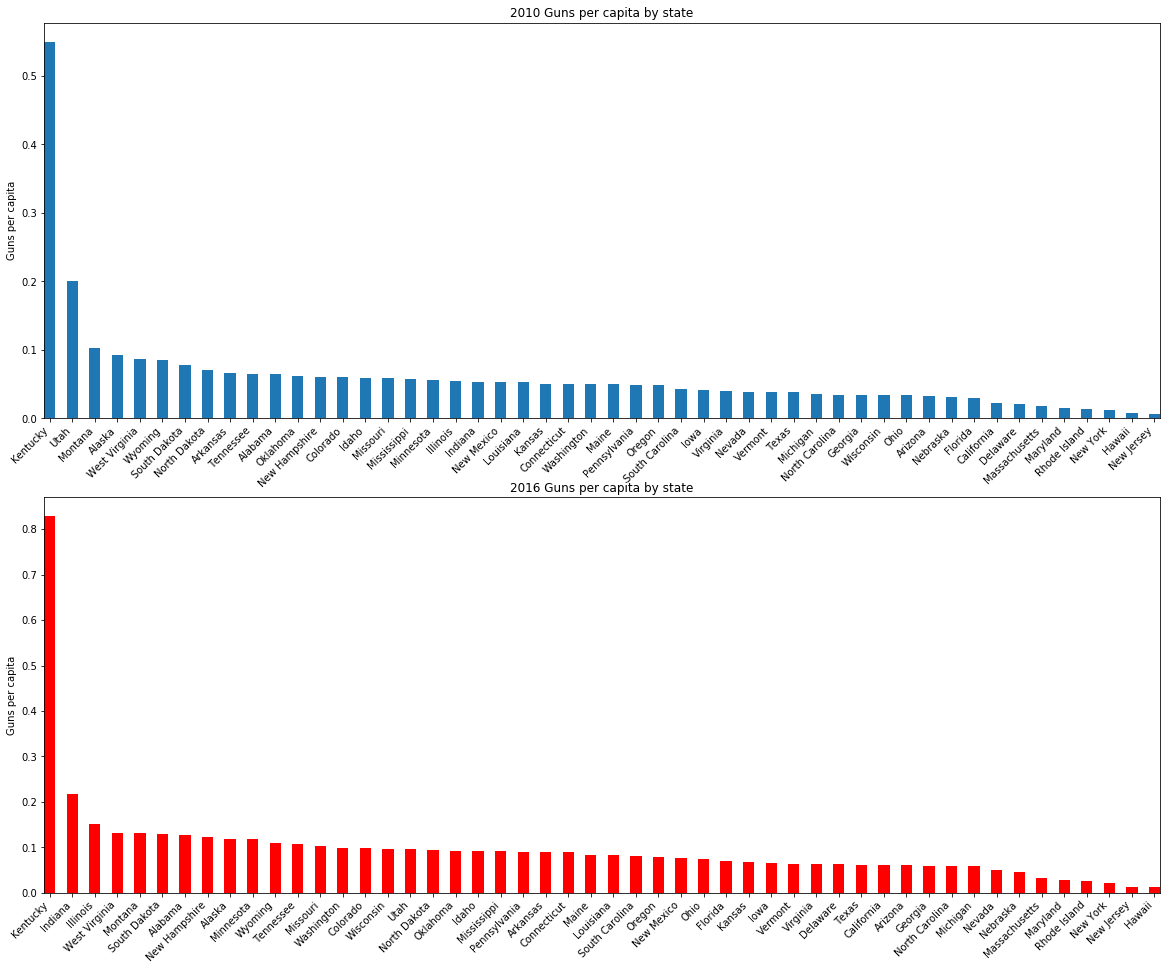

In [35]:
fig, axes = plt.subplots(nrows=2, figsize=(20,16))
width = .5

x = full_df.index

full_df_sorted_2010 = full_df.sort_values('2010 - Guns per capita',ascending=False)
y1 = full_df_sorted_2010['2010 - Guns per capita']

full_df_sorted_2016 = full_df.sort_values('2016 - Guns per capita',ascending=False)
y2 = full_df_sorted_2016['2016 - Guns per capita']

axes[0].set_ylabel('Guns per capita')
axes[0].set_title('2010 Guns per capita by state')
axes[0].margins(x=0)

axes[1].set_ylabel('Guns per capita')
axes[1].set_title('2016 Guns per capita by state')
axes[1].margins(x=0)

#plt.xticks(x, full_df_sorted_2010.state, rotation=45)
axes[0].set_xticklabels(full_df_sorted_2010.state, rotation=45, horizontalalignment='right')
axes[0].bar(x,y1,width,tick_label=full_df_sorted_2010.state,align='center')

axes[1].set_xticklabels(full_df_sorted_2016.state, rotation=45, horizontalalignment='right')
axes[1].bar(x,y2,width,tick_label=full_df_sorted_2016.state,align='center',color='red')

**Kentucky is off the charts for both 2010 and 2016. West Virginia and Montana both also remain in the Top 5 in both years.**

### What type of populations exist where there are more gun owners?

**I'm interested in race and economics in relation to gun ownership. Is there a trend to be found between one of these and gun ownership?**

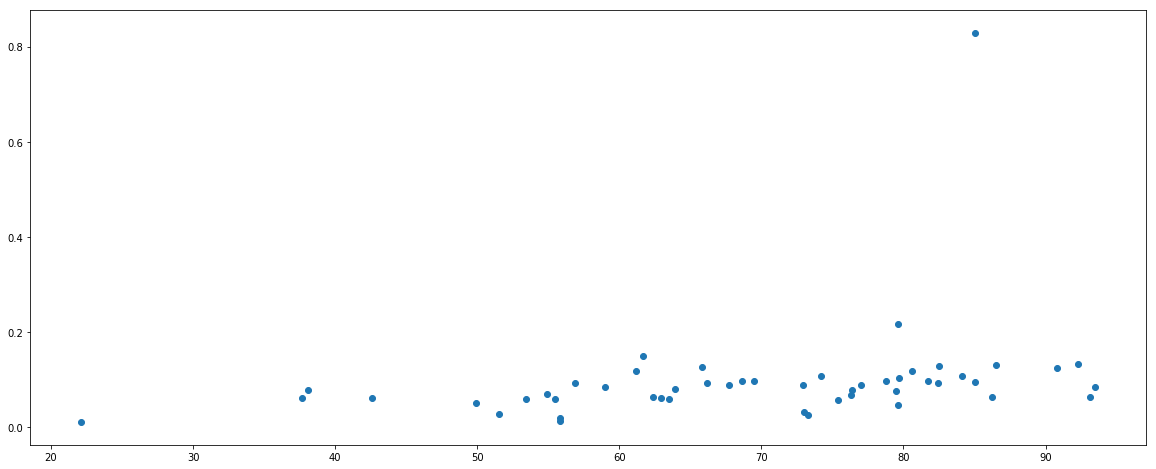

In [36]:
plt.figure(figsize=(20,8))
#plt.xticks(x, full_df.state, rotation=60, horizontalalignment='right')
plt.scatter(full_df["White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)"], full_df['2016 - Guns per capita'])

**It's tough to tell with the Kentucky outlier up there, so let's remove it from the graph.**

In [37]:
full_df_no_ky = full_df[full_df.state != 'Kentucky']

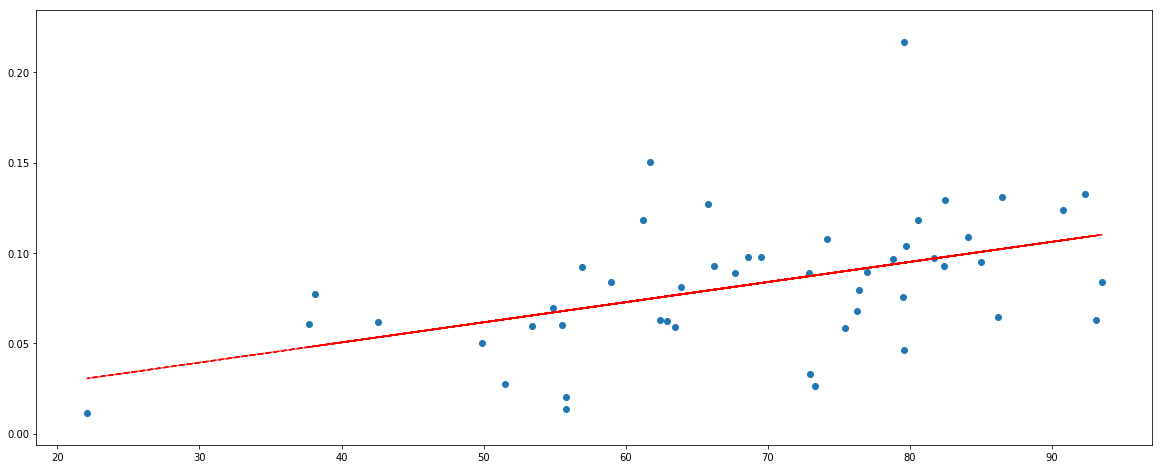

In [38]:
x = full_df_no_ky["White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)"]
y = full_df_no_ky['2016 - Guns per capita']
plt.figure(figsize=(20,8))
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

**With Kentucky removed, and a trend line added, there does appear to be a positive correlation between percentage of Whites in a population and per capita gun ownership. Now let's look at economics.**

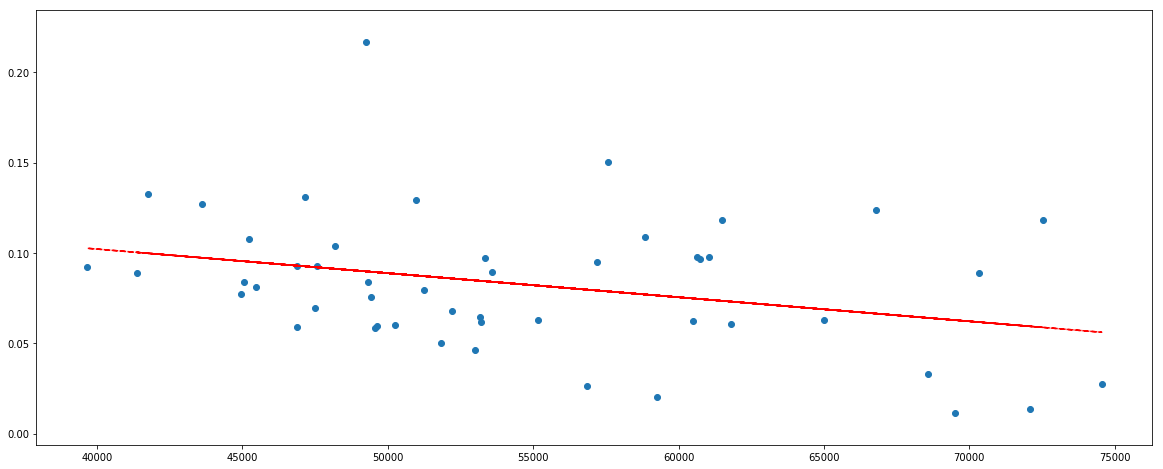

In [39]:
x = full_df_no_ky["Median household income (in 2015 dollars), 2011-2015"]
y = full_df_no_ky['2016 - Guns per capita']
plt.figure(figsize=(20,8))
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

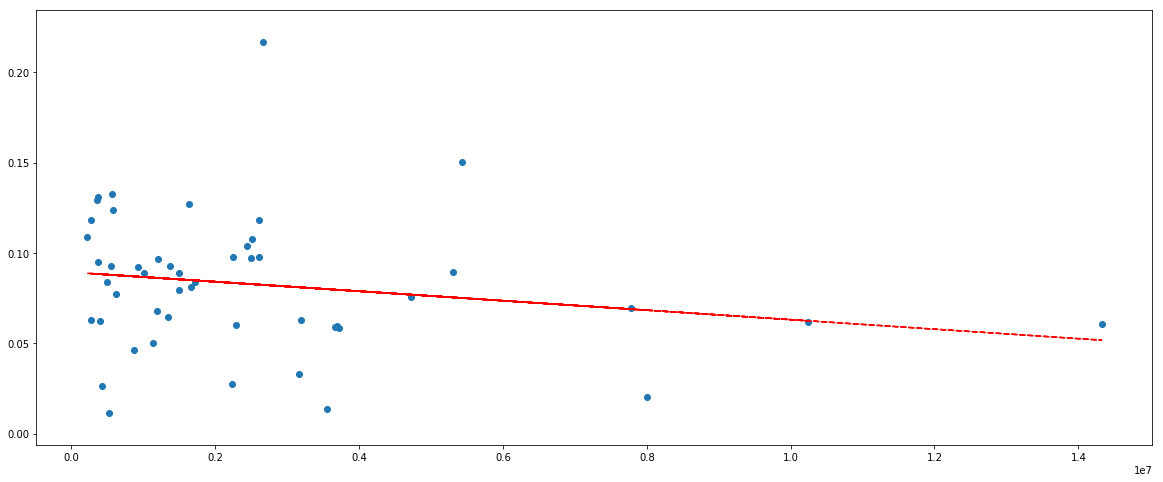

In [40]:
x = full_df_no_ky["Total employment, 2015"]
y = full_df_no_ky['2016 - Guns per capita']
plt.figure(figsize=(20,8))
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

**There is also some negative correlation between gun ownership and both median household income and total employment.**

<a id='conclusions'></a>
## Conclusions

**The Top 5 states for gun ownership in 2010 were Kentucky, Utah, Montana, Alaska, and West Virginia. In 2016, Kentucky remained at the top, followed by Indiana, Illinois, West Virginia, and Montana.**

**Demographically, gun ownership was higher in states with a higher percentage of White population, lower median household incomes, and lower total employment.**

**An interesting next potential step would be to examine these demographics in the states that both left and joined the Top 5 and see how these specific demographics shifted in those states and whether that follows the trends found. Unfortunately this data set doesn't have all the data necessary to do that analysis.**